# ATTRITION PREDICTION

## EDA FOR EMPLOYEE ATTRITION

### IGNORE WARNINGS 

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

### LIST OF FILES IN THE DIRECTORY

In [2]:
import os
os.listdir()

['Decision_tree.png',
 'README.md',
 'Employee_Attrition.ipynb',
 '.git',
 'Attrition_Data.csv',
 '.ipynb_checkpoints']

### IMPORTING REQUIRED LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns              

### IMPORTING & READING THE DATASET

In [4]:
data = pd.read_csv('Attrition_Data.csv')
pd.set_option('max_columns',None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### NUMBER OF ROWS AND COLUMNS IN DATASET

In [6]:
rows, columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns')

Dataset has 2940 rows and 35 columns


### BASIC INFO ON DATASET

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

### NUMBER OF FEATURES  AND PERCENTAGE OF NULL VALUES

In [8]:
# number of numerical and categorical features
num, obj = 0,0
for feature in data.columns:
    if data.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features')

# Percentage of missing values
print('\nPERCENTAGE MISSING VALUES:')
total = 0
for feature in data.columns:
    total += len(data[feature])
    
missing = data.isnull().mean()
print('There is no missing values in dataset' if total==data.size else missing)

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 26 numerical features and 9 categorical features

PERCENTAGE MISSING VALUES:
There is no missing values in dataset


### LOOKING FOR DUPLICATES IN THE DATASET

In [9]:
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


### NUMBER OF UNIQUE CATEGORICAL FEATURES

In [10]:
for feature in data:
    if data[feature].dtype=='O' and feature != 'Attrition':
        if len(data[feature].unique())==1:
            print(f'** {feature} has {len(data[feature].unique())} unique vaue **')
        else:
            print(f'{feature} has {len(data[feature].unique())} unique vaue')

BusinessTravel has 3 unique vaue
Department has 3 unique vaue
EducationField has 6 unique vaue
Gender has 2 unique vaue
JobRole has 9 unique vaue
MaritalStatus has 3 unique vaue
** Over18 has 1 unique vaue **
OverTime has 2 unique vaue


In [11]:
# removing the feature

del data['Over18']

### NUMBER OF UNIQUE NUMERICAL FEATURES

In [12]:
for feature in data:
    if data[feature].dtype!='O':
        if len(data[feature].unique())==1:
            print(f'** {feature} has {len(data[feature].unique())} unique vaue **')
        else:
            print(f'{feature} has {len(data[feature].unique())} unique vaue')

Age has 43 unique vaue
DailyRate has 886 unique vaue
DistanceFromHome has 29 unique vaue
Education has 5 unique vaue
** EmployeeCount has 1 unique vaue **
EmployeeNumber has 2940 unique vaue
EnvironmentSatisfaction has 4 unique vaue
HourlyRate has 71 unique vaue
JobInvolvement has 4 unique vaue
JobLevel has 5 unique vaue
JobSatisfaction has 4 unique vaue
MonthlyIncome has 1349 unique vaue
MonthlyRate has 1427 unique vaue
NumCompaniesWorked has 10 unique vaue
PercentSalaryHike has 15 unique vaue
PerformanceRating has 2 unique vaue
RelationshipSatisfaction has 4 unique vaue
** StandardHours has 1 unique vaue **
StockOptionLevel has 4 unique vaue
TotalWorkingYears has 40 unique vaue
TrainingTimesLastYear has 7 unique vaue
WorkLifeBalance has 4 unique vaue
YearsAtCompany has 37 unique vaue
YearsInCurrentRole has 19 unique vaue
YearsSinceLastPromotion has 16 unique vaue
YearsWithCurrManager has 18 unique vaue


In [13]:
# removing the features

del data['StandardHours']
del data['EmployeeCount']
del data['EmployeeNumber']

### NUMBER OF COLUMNS AFTER REMOVING 3 FEATURES

In [14]:
row, column = data.shape
print(f'The dataset has {column} columns')

The dataset has 31 columns


### OBSERVATION ON TAGET VARIABLE

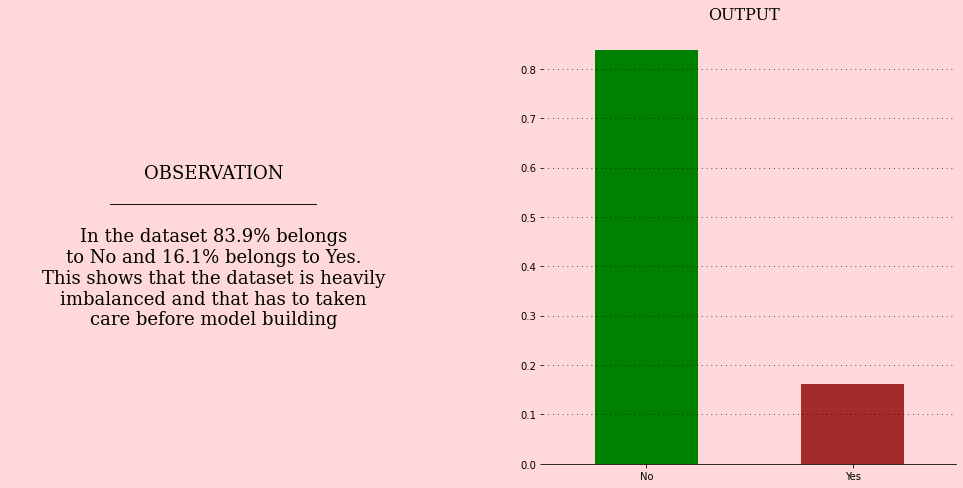

In [15]:
# Creating plot structure
fig = plt.figure(figsize=(17,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3,hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)
    
# Plotting graph
data['Attrition'].value_counts(normalize=True).plot.bar(color=['green', 'brown'])
sec_2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=0)
sec_2.text(0.3,0.9,'OUTPUT',fontsize=16, fontfamily='serif')

# Narrating the observation
Max, Min = data['Attrition'].value_counts(normalize=True)*100
Max = np.round(Max, 1)
Min = np.round(Min, 1)

sec_1.text(0.5,0.5,f'OBSERVATION\n_______________________\n\nIn the dataset {Max}% belongs\nto No \
and {Min}% belongs to Yes.\nThis shows that the dataset is heavily\nimbalanced and that has to taken\
\ncare before model building',ha='center',va='center',size=18, family='serif')

# Removing axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for position in ['left', 'right', 'top', 'bottom']:
    for selection in [sec_1, sec_2]:
        if position == 'bottom' and selection == sec_2:
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

### COMPARING THE QUANTITATIVE DATA DISTRIBUTION OF ATTRITION AS HUE 

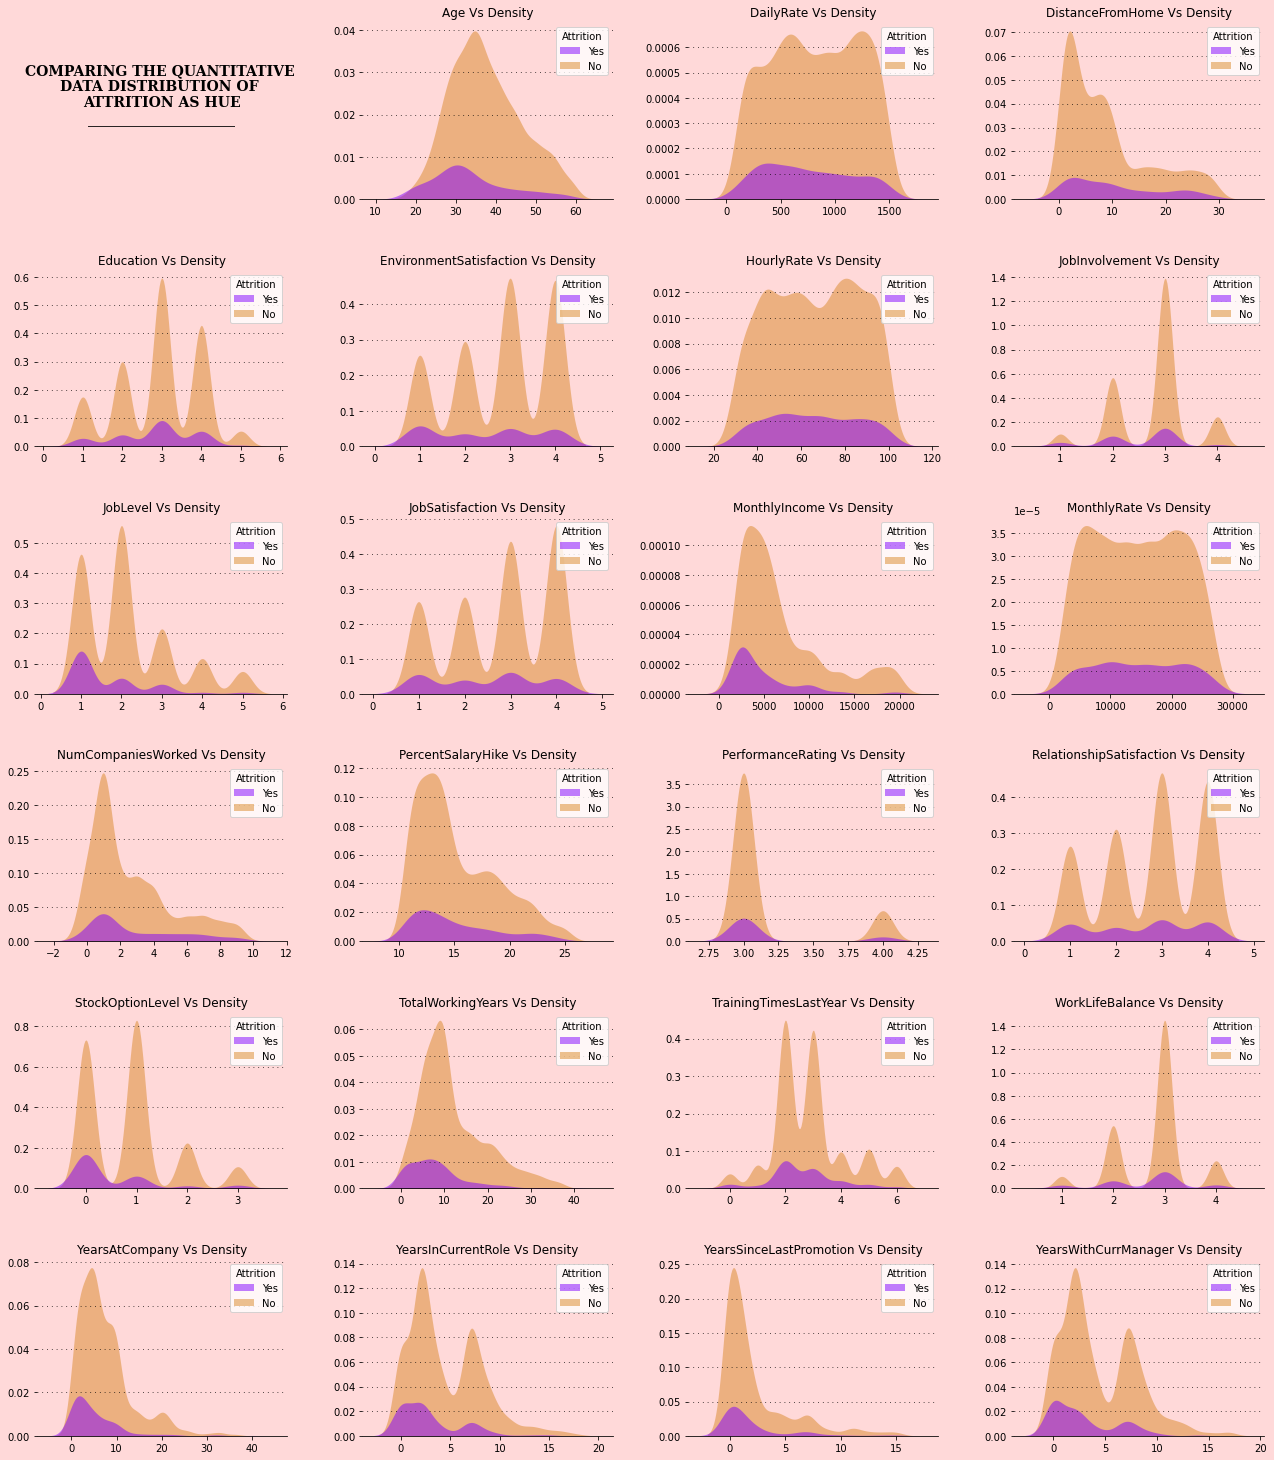

In [16]:
# Creating plot structure
fig = plt.figure(figsize=(22,26))
spec = fig.add_gridspec(6,4)
spec.update(wspace=0.3, hspace=0.4)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, 
                  sec_17, sec_18, sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]:
    selection.set_facecolor(bg_color)

# Plotting graph
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
       sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, 
       sec_17, sec_18, sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]
cnt = 0
for feature in data:
    if data[feature].dtype!='O':
        sns.kdeplot(feature, hue='Attrition', ax = sec[cnt],
                    fill=True, palette=["#8000ff","#da8829"], 
                    alpha=0.5, linewidth=0, data=data )
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature+' Vs Density')
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        
        for position in ['left', 'right', 'top']:
            sec[cnt].spines[position].set_visible(False)        
        cnt += 1
        
# Creating plot structure title        
sec_01.text(0.5,0.5,'COMPARING THE QUANTITATIVE \nDATA DISTRIBUTION OF \nATTRITION AS HUE\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)        

# Removing axis and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)

### COMPARING THE QUALITATIVE DATA DISTRIBUTION AS HUE FOR ATTRITION

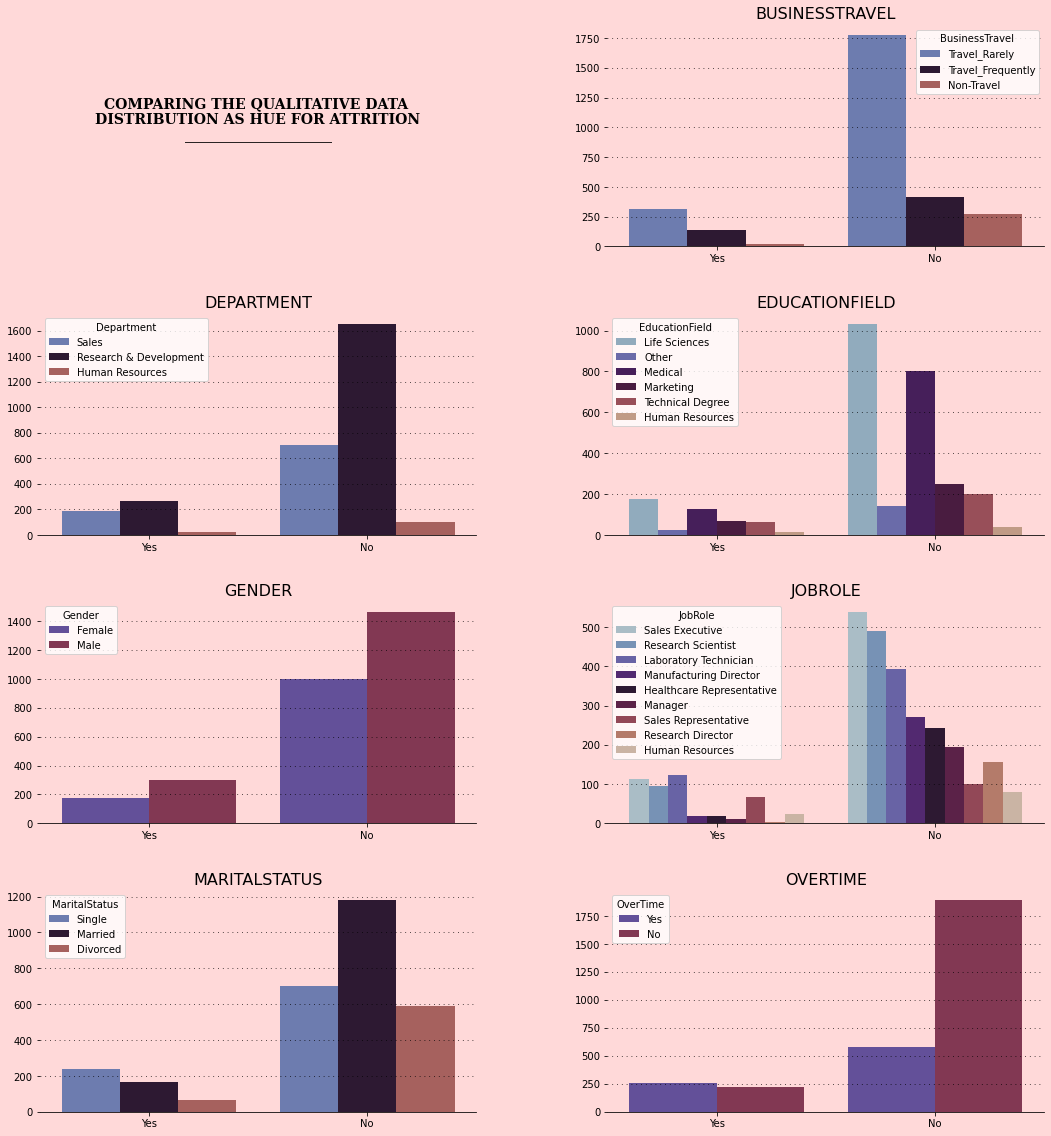

In [17]:
# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])
sec_3 = plt.subplot(spec[1,0])
sec_4 = plt.subplot(spec[1,1])
sec_5 = plt.subplot(spec[2,0])
sec_6 = plt.subplot(spec[2,1])
sec_7 = plt.subplot(spec[3,0])
sec_8 = plt.subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)
    
# Plotting graph
sec = [sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]
cnt = 0
for feature in data:
    if data[feature].dtype=='O' and feature != 'Attrition':
        sns.countplot('Attrition',hue=feature, data=data, ax=sec[cnt], palette='twilight')
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('')
        sec[cnt].set_title(feature.upper(), fontsize=16)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        
        for position in ['top', 'right', 'left']:
            sec[cnt].spines[position].set_visible(False)
        cnt+=1

# Creating plot structure title
sec_1.text(0.5,0.5,'COMPARING THE QUALITATIVE DATA \nDISTRIBUTION AS HUE FOR ATTRITION\
\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)        

# Removing axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_1.spines[location].set_visible(False)

## UNIVARIATE ANALYSIS

### CREATING DATASET WHERE ATTTRITION IS YES

In [18]:
# Creating a dataset where only attrition is true
data_filtered = data[data['Attrition'] == 'Yes']
data_filtered.shape

(474, 31)

### ATTRITION COUNT PLOT FOR QUALITATIVE FEATURES

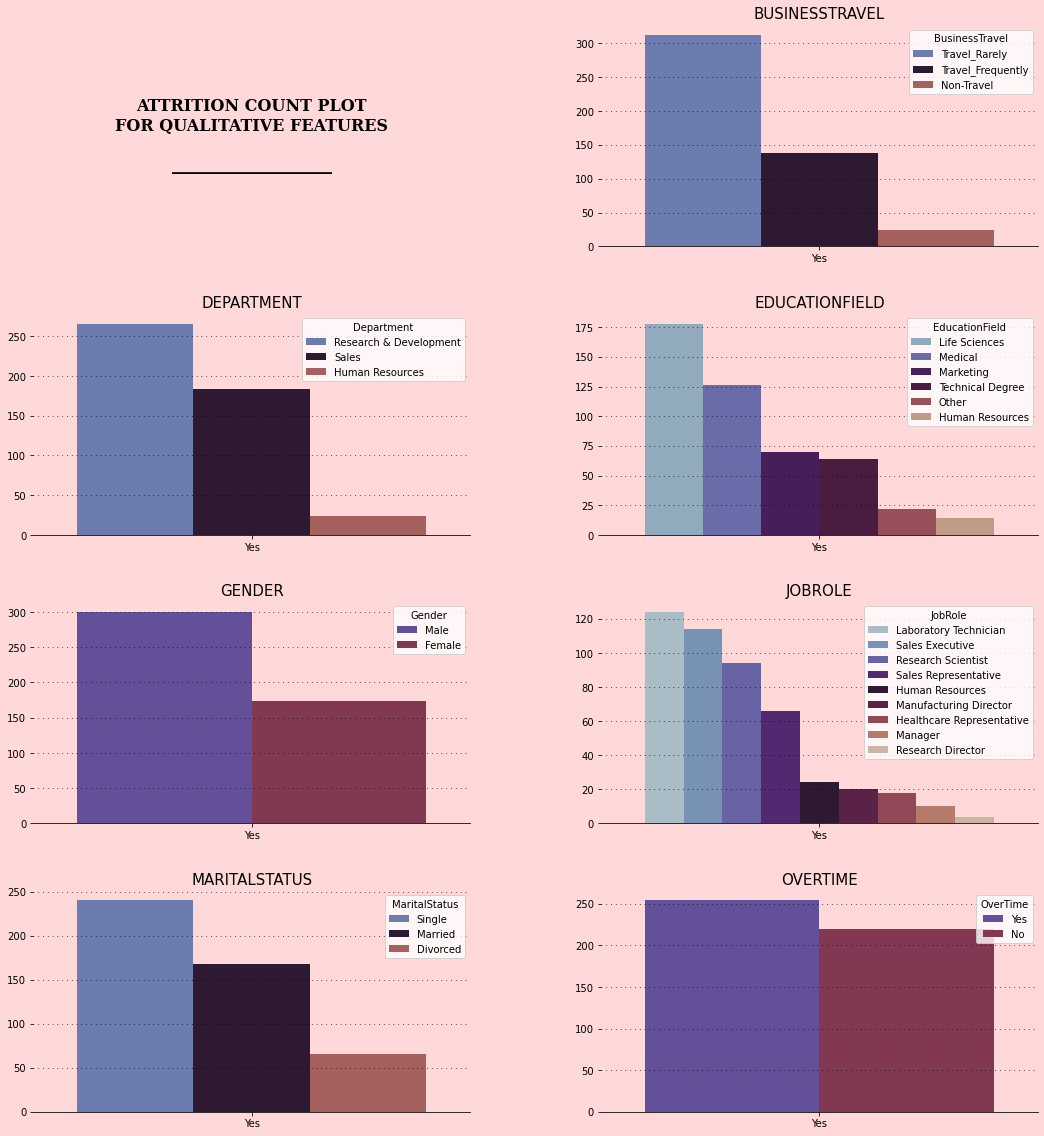

In [19]:
# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])
sec_3 = plt.subplot(spec[1,0])
sec_4 = plt.subplot(spec[1,1])
sec_5 = plt.subplot(spec[2,0])
sec_6 = plt.subplot(spec[2,1])
sec_7 = plt.subplot(spec[3,0])
sec_8 = plt.subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)
    
# Plotting graph
axis = [sec_2, sec_3, sec_4, sec_5, sec_6, sec_7,sec_8]
cnt = 0
for feature in data_filtered:
    if data_filtered[feature].dtype=='O' and feature != 'Attrition':
        sns.countplot(ax=axis[cnt], x = 'Attrition', hue = feature,
                      hue_order = data_filtered[feature].value_counts().index,
                      data = data_filtered,  palette='twilight')
        axis[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        axis[cnt].set_xlabel("")
        axis[cnt].set_ylabel("")
        axis[cnt].set_title(feature.upper(), fontsize=15)
        
        # Removing the spines
        for location in ['top', 'right', 'left']:
            axis[cnt].spines[location].set_visible(False)
        cnt+=1 
    
# Creating plot structure title
sec_1.text(0.5,0.5,'ATTRITION COUNT PLOT\nFOR QUALITATIVE FEATURES\n\n____________________',
           ha='center',va='center',size=16,family='serif',weight=600)

# Removing the axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for location in ['bottom', 'top', 'right', 'left']:
    sec_1.spines[location].set_visible(False)

### ATTRITION COUNT PLOT FOR QUANTITATIVE FEATURES HAVING MORE THAN 30 UNIQUE VALUES

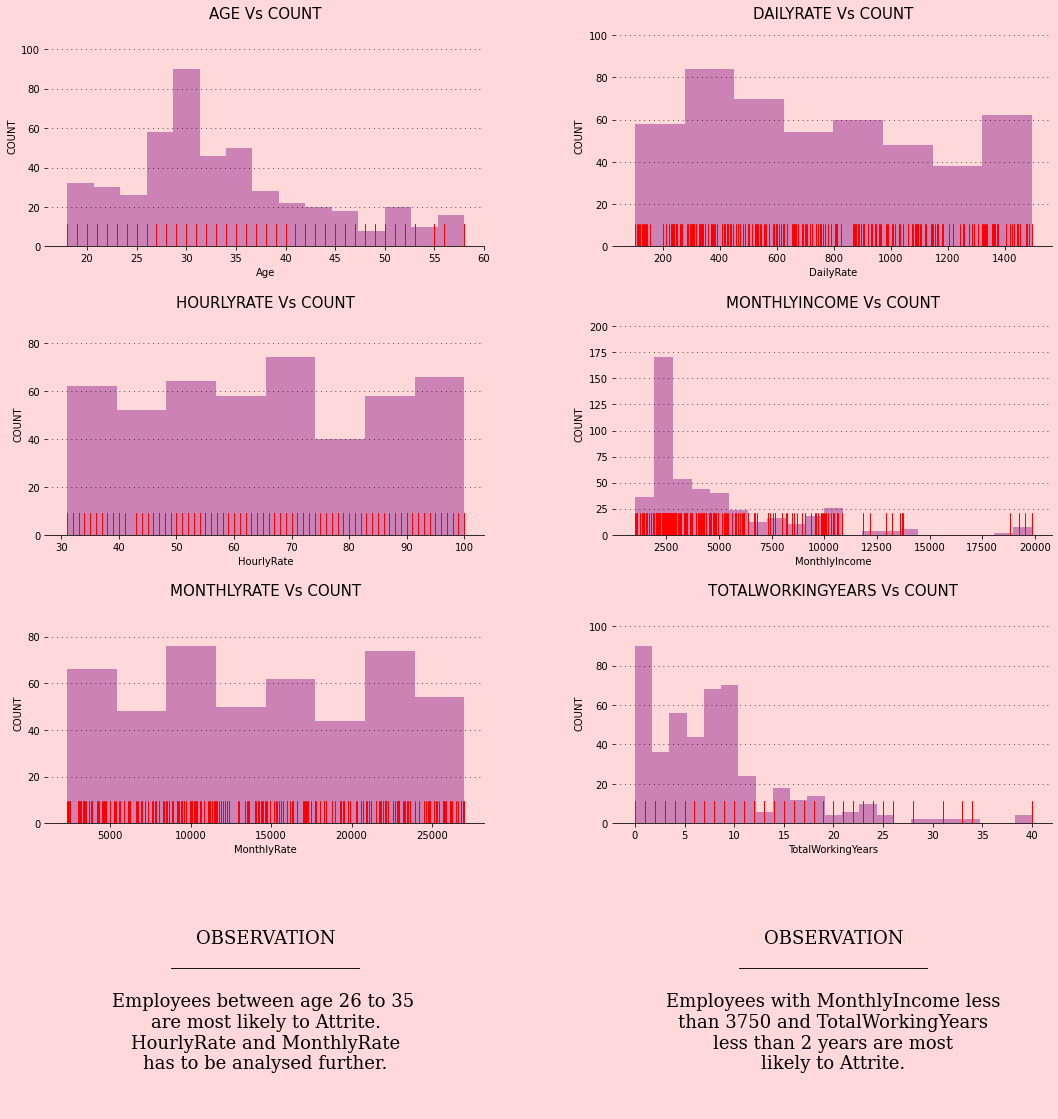

In [20]:
# Creating plot structure
fig = plt.figure(figsize=(18,20))
spec = fig.add_gridspec(4,2)
spec.update(wspace=0.3,hspace=0.3)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])
sec_5 = fig.add_subplot(spec[2,0])
sec_6 = fig.add_subplot(spec[2,1])
sec_7 = fig.add_subplot(spec[3,0])
sec_8 = fig.add_subplot(spec[3,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4, sec_5, sec_6, sec_7, sec_8]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_1, sec_2, sec_3, sec_4, sec_5, sec_6]
cnt = 0
for feature in data_filtered:
    if len(data_filtered[feature].unique())>30 and data_filtered[feature].dtype!='O':
        sns.distplot(data_filtered[feature], kde=False, rug = True,
                     rug_kws={'height':0.1, 'color':'red'}, color='purple', ax=sec[cnt])
        sec[cnt].set_ylabel("COUNT")
        sec[cnt].set_title(feature.upper()+' Vs COUNT', fontsize=15)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        
        # Removing the spines
        for location in ['top', 'right', 'left']:
            sec[cnt].spines[location].set_visible(False)
        cnt += 1

# Narrating the observations        
sec_7.text(0.5,0.5,'OBSERVATION\n_____________________\n\nEmployees between age 26 to 35 \
\nare most likely to Attrite.\nHourlyRate and MonthlyRate\
\nhas to be analysed further.',ha='center',va='center',size=18,family='serif',weight=550)

sec_8.text(0.5,0.5,'OBSERVATION\n_____________________\n\nEmployees with MonthlyIncome less\
\nthan 3750 and TotalWorkingYears\nless than 2 years are most\
\nlikely to Attrite.',ha='center',va='center',size=18,family='serif',weight=550)


# Removing the axis and spines
for location in ['top', 'bottom', 'right', 'left']:
    for section in [sec_7, sec_8]:
        section.spines[location].set_visible(False)
        section.xaxis.set_visible(False)
        section.yaxis.set_visible(False)


### ATTRITION COUNT PLOT FOR QUANTITATIVE FEATURES HAVING LESS THAN 30 UNIQUE VALUES

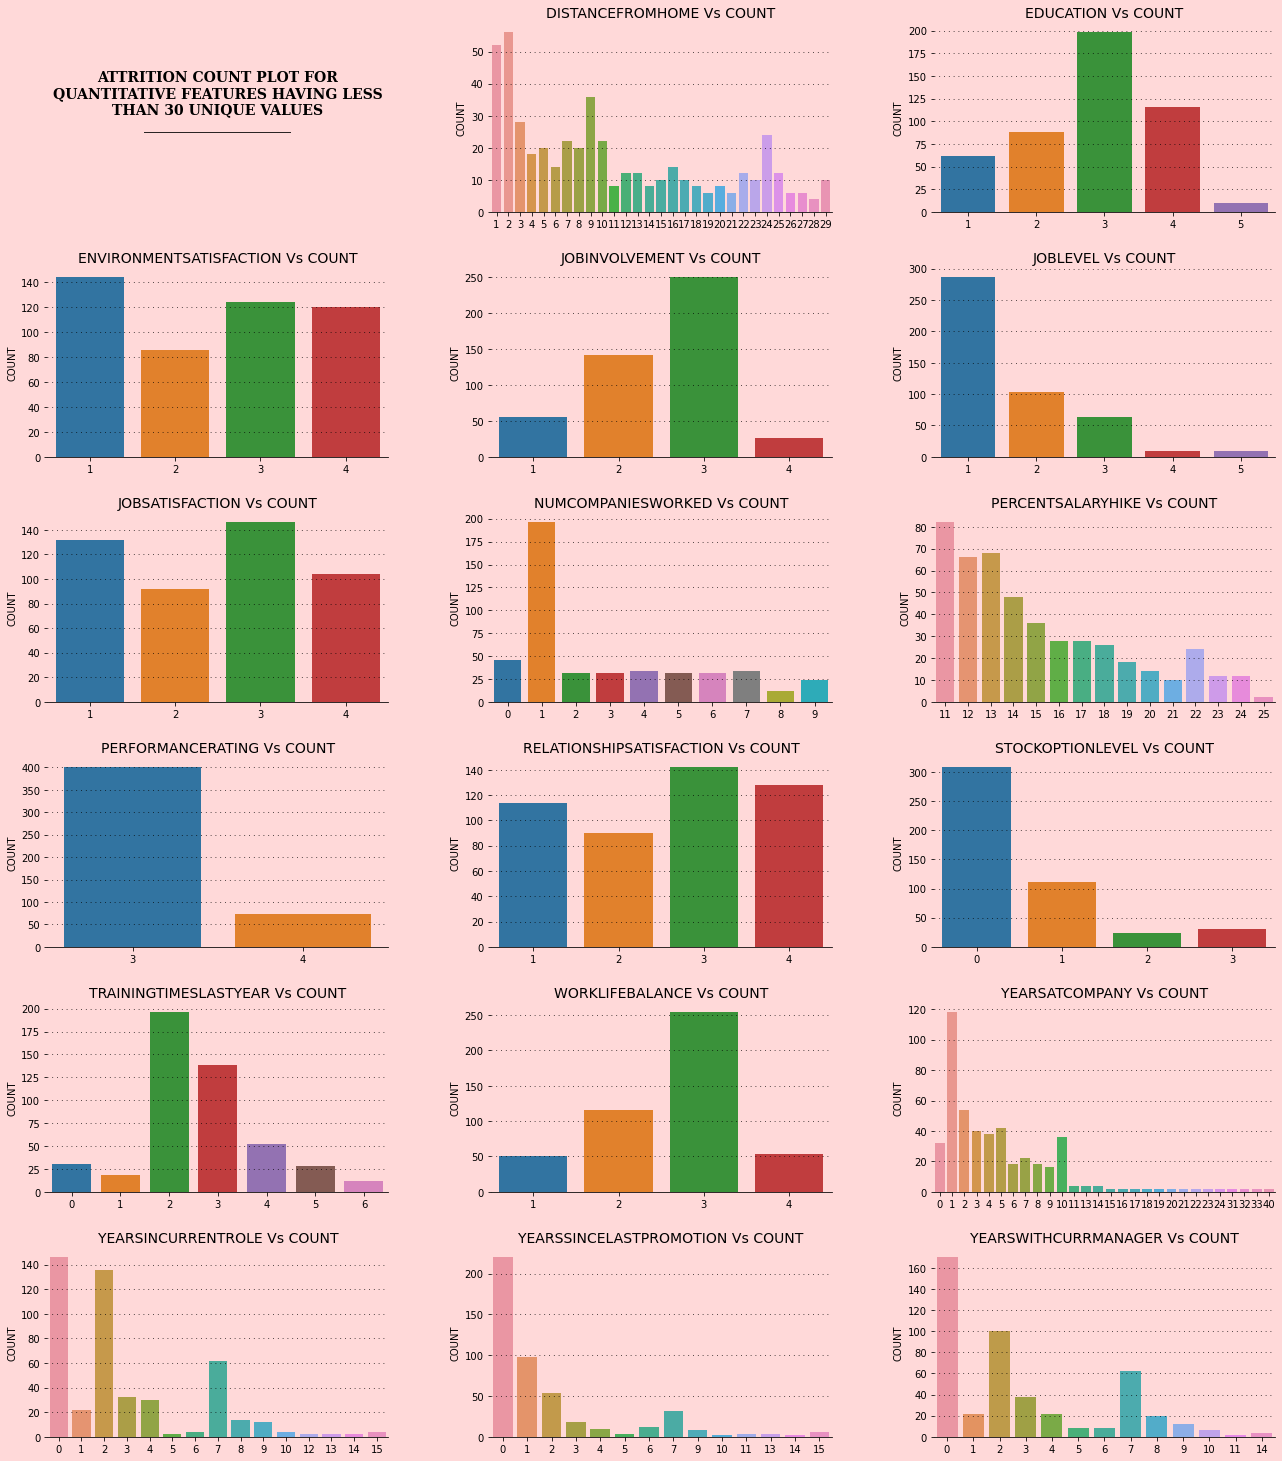

In [21]:
# Creating plot structure
fig = plt.figure(figsize=(22,26))
spec = fig.add_gridspec(6,3)
spec.update(wspace=0.3, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])
sec_07 = fig.add_subplot(spec[2,0])
sec_08 = fig.add_subplot(spec[2,1])
sec_09 = fig.add_subplot(spec[2,2])
sec_10 = fig.add_subplot(spec[3,0])
sec_11 = fig.add_subplot(spec[3,1])
sec_12 = fig.add_subplot(spec[3,2])
sec_13 = fig.add_subplot(spec[4,0])
sec_14 = fig.add_subplot(spec[4,1])
sec_15 = fig.add_subplot(spec[4,2])
sec_16 = fig.add_subplot(spec[5,0])
sec_17 = fig.add_subplot(spec[5,1])
sec_18 = fig.add_subplot(spec[5,2])


# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,sec_09, sec_10, 
       sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18]
cnt = 0
for feature in data_filtered:
    if len(data_filtered[feature].unique())<30 and data_filtered[feature].dtype!='O':
        sns.countplot(data_filtered[feature],ax=sec[cnt])
        sec[cnt].set_xlabel('')
        sec[cnt].set_ylabel('COUNT')
        sec[cnt].set_title(feature.upper()+' Vs COUNT', fontsize=14)
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        
        for location in ['top', 'right', 'left']:
            sec[cnt].spines[location].set_visible(False)
            
        cnt += 1

# Creating plot structure title
sec_01.text(0.5,0.5,'ATTRITION COUNT PLOT FOR\nQUANTITATIVE FEATURES HAVING LESS\
\nTHAN 30 UNIQUE VALUES\n_____________________\n\n',
            ha='center', va='center', size=14, family='serif', weight=600)        

# Removing labels and spines
sec_01.xaxis.set_visible(False)
sec_01.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_01.spines[location].set_visible(False)

## BIVARIATE ANALYSIS

### JobRole Vs MonthlyIncome

In [22]:
# Creating dataset that has mean MonthlyIncome of every JobRole
datamean = data_filtered.groupby('JobRole')['MonthlyIncome'].mean().reset_index()
datamean.set_index('JobRole', inplace=True)
datamean.sort_values(by='MonthlyIncome', inplace=True)

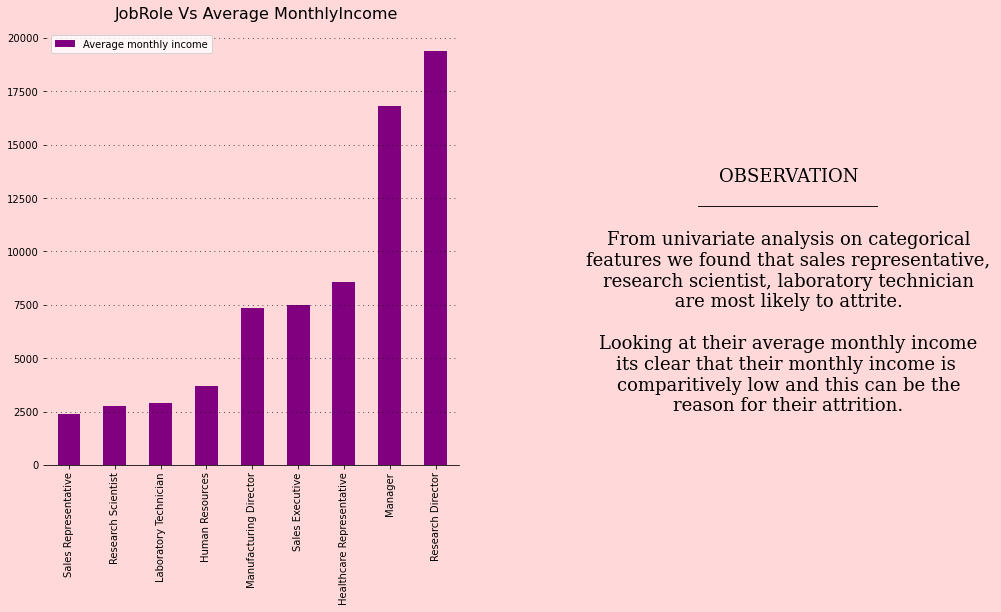

In [23]:
# Creating plot structure
fig = plt.figure(figsize=(17,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3, hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# PLotting the graph
datamean.plot.bar(color='purple', ax=sec_1)
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_1.legend(['Average monthly income'])
sec_1.text(1,20900,'JobRole Vs Average MonthlyIncome', size=16)
sec_1.set_xlabel('')

# Narrating the observation
sec_2.text(0.5,0.4,'OBSERVATION\n____________________\n\nFrom univariate analysis on categorical\
\nfeatures we found that sales representative,\nresearch scientist, laboratory technician\
\n are most likely to attrite. \n\nLooking at their average monthly income\nits clear that their\
 monthly income is \ncomparitively low and this can be the\nreason for their attrition.',
           ha='center', va='center', size=18, family='serif',weight=550)# NArrating the observation

# Removing the labels and spines
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top','right','left','bottom']:
    for selection in [sec_1, sec_2]:
        if location == 'bottom' and selection == sec_1:
            continue
        else:
            selection.spines[location].set_visible(False)

### Analysis on Sales Executive Attrition

In [24]:
# Creating a dataframe where employee JobRole is Sales Executive
salEx_data = data_filtered[data_filtered['JobRole'] == 'Sales Executive']
salEx_data.shape

(114, 31)

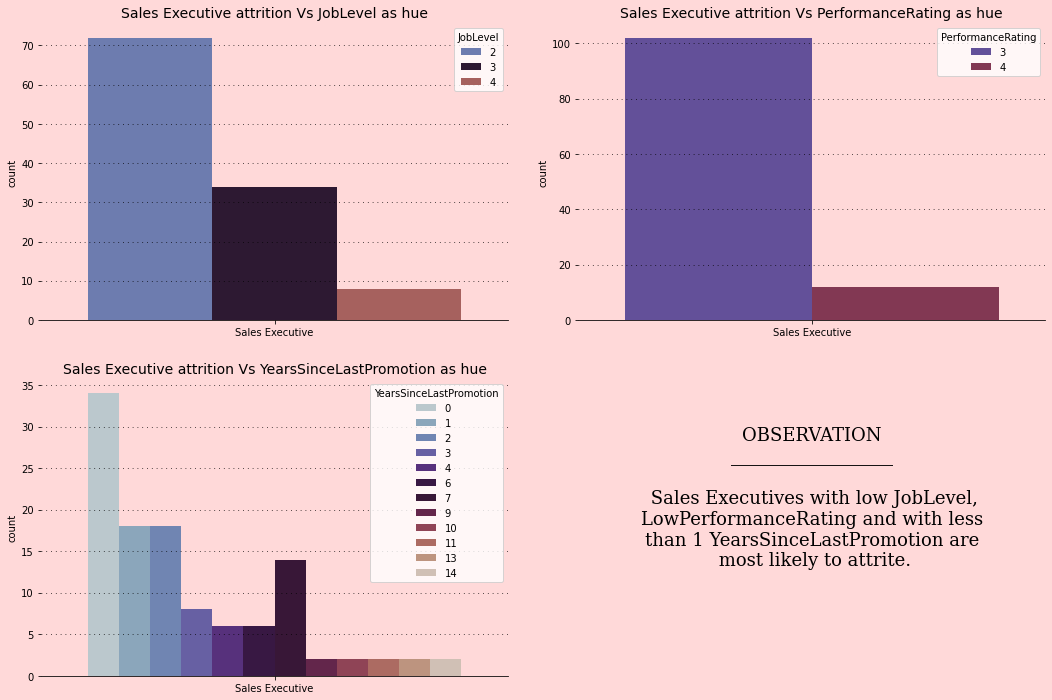

In [25]:
# Creating plot structure
fig = plt.figure(figsize=(18,12))
spec = fig.add_gridspec(2,2)
spec.update(wspace=0.15,hspace=0.2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[1,0])
sec_4 = fig.add_subplot(spec[1,1])

# Adding color preferences
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2, sec_3, sec_4]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_1, sec_2, sec_3, sec_4]
cnt = 0
for hue in ['JobLevel', 'PerformanceRating', 'YearsSinceLastPromotion']:
    sns.countplot('JobRole', hue=hue, data=salEx_data, palette='twilight', ax=sec[cnt])
    sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sec[cnt].set_title('Sales Executive attrition Vs '+hue+' as hue', size=14)
    sec[cnt].set_xlabel('')
    for location in ['top', 'right', 'left']:
        sec[cnt].spines[location].set_visible(False)
    cnt+=1

# Narrating the observation
sec_4.text(0.5,0.6,'OBSERVATION\n__________________\n\n Sales Executives with low JobLevel,\
\nLowPerformanceRating and with less\
\nthan 1 YearsSinceLastPromotion are\n most likely to attrite.',
           ha='center',va='center',size=18,weight=550,family='serif')    

# Removing axis and spines
sec_4.xaxis.set_visible(False)
sec_4.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    sec_4.spines[location].set_visible(False)

        

### ANALYSISNG THE ATTITION BASED ON YEARS AT COMPANY

In [26]:
NumCom_data = data_filtered[data_filtered['YearsAtCompany']==1]
NumCom_data.shape

(118, 31)

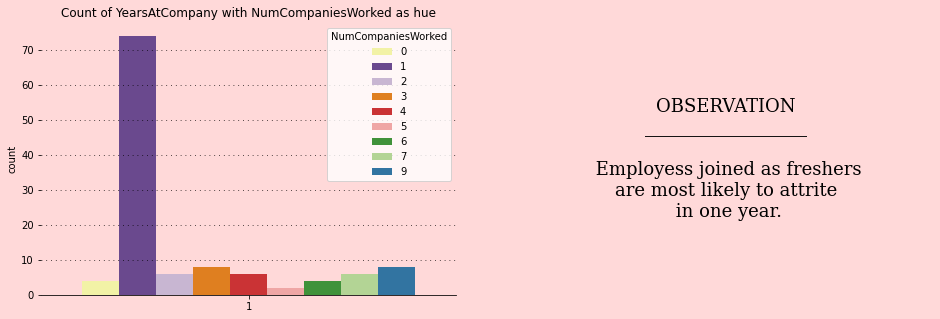

In [27]:
# Creating plot structure
fig = plt.figure(figsize=(16,5))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.15,hspace=0.2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
   
# Adding color preferences
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sns.countplot('YearsAtCompany', hue='NumCompaniesWorked', data=NumCom_data, palette = 'Paired_r', ax=sec_1)
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_1.set_title('Count of YearsAtCompany with NumCompaniesWorked as hue')
sec_1.set_xlabel('')

# Narrating the observation
sec_2.text(0.5,0.5,'OBSERVATION\n__________________\n\n Employess joined as freshers\
\nare most likely to attrite\n in one year.',
           ha='center',va='center',size=18,weight=550,family='serif')   

# Removing the labels and spines
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    for selection in [sec_1, sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

### ANALYSIS ON ATTRITION BASED ON AGE

In [28]:
# Creating a new column for range of age:

condition = [data_filtered['Age'].between(18,25),
             data_filtered['Age'].between(26,35),
             data_filtered['Age'].between(36,45),
             data_filtered['Age'].between(46,58)]

values = ['18 to 25', '26 to 35', '36 to 45', '46 to 58']

data_filtered['AgeRange'] = np.select(condition, values)

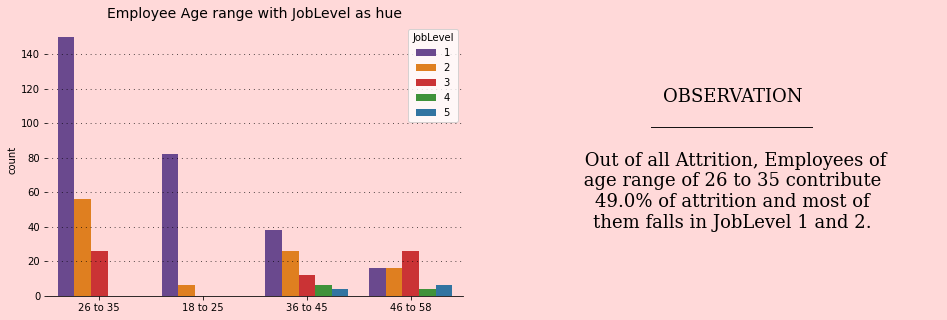

In [29]:
# Creating plot structure
fig = plt.figure(figsize=(16,5))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.15,hspace=0.2)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
   
# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sns.countplot('AgeRange', hue='JobLevel', order = data_filtered['AgeRange'].value_counts().index,
              data=data_filtered, palette = 'Paired_r', ax=sec_1)
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_1.set_title('Employee Age range with JobLevel as hue', fontsize=14)
sec_1.set_xlabel('')

# Narrating the observation
drow, dcolumn = data_filtered.shape
ar_cnt = (data_filtered.AgeRange == '26 to 35').sum()
value = np.round((ar_cnt/drow),2)*100
sec_2.text(0.5,0.5,f'OBSERVATION\n__________________\n\n Out of all Attrition, Employees of\
\n age range of 26 to 35 contribute \n{value}% of attrition and most of\nthem falls in JobLevel 1 and 2.',
           ha='center',va='center',size=18,weight=550,family='serif')   

# Removing axis and spines
sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    for selection in [sec_1, sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

## PREPARING DATA FOR MODEL BUILDING

In [30]:
# Creating a copy of dataset for model building
data_model = data.copy()
data_model.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### OUTLIER TREATMENT

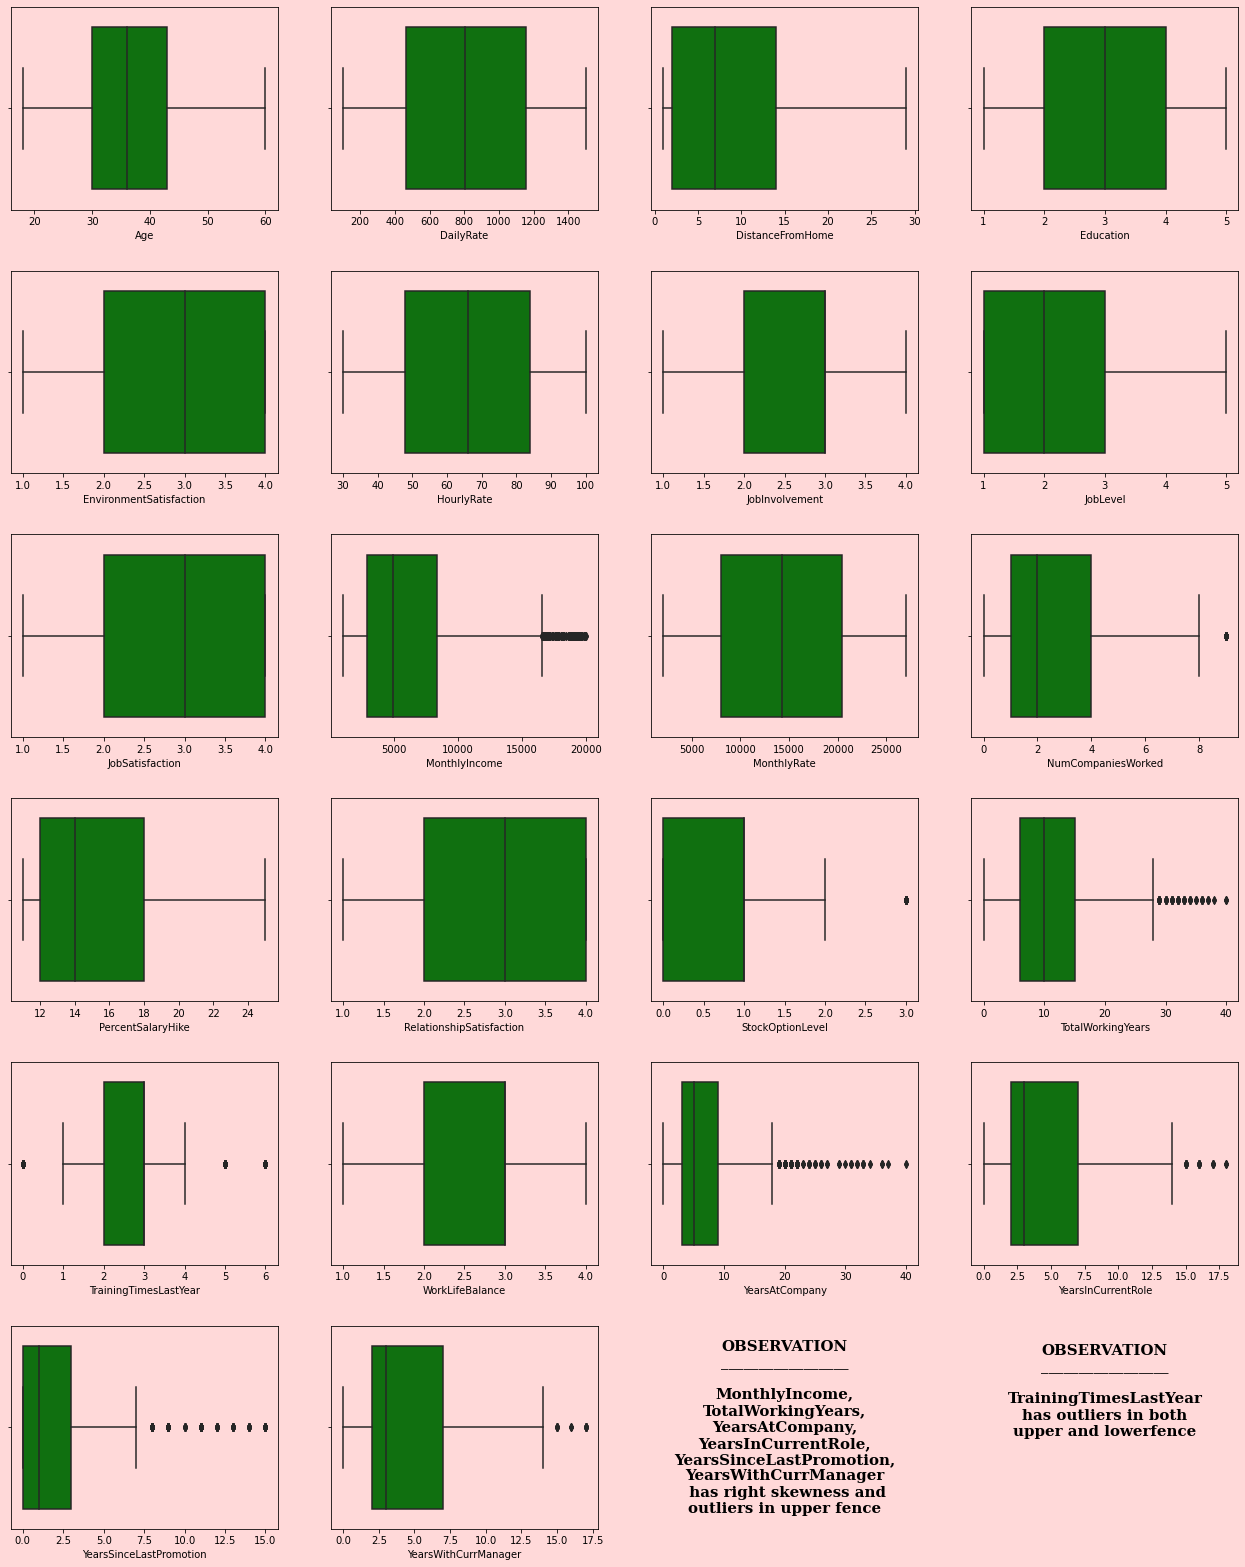

In [31]:
# Creating subplots
fig = plt.figure(figsize=(22,28))
spec = fig.add_gridspec(6,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, 
                  sec_17, sec_18,sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11, 
       sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18, sec_19, sec_20, sec_21, sec_22]
cnt = 0
for feature in data_model:
    if data_model[feature].dtype!='O' and len(data_model[feature].unique())>2:
        sns.boxplot(data_model[feature], ax=sec[cnt], color='green')
        cnt+=1
        
# Narating the observations
sec_23.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
MonthlyIncome,\nTotalWorkingYears,\nYearsAtCompany,\nYearsInCurrentRole,\
\nYearsSinceLastPromotion,\nYearsWithCurrManager\n has right skewness and\
\noutliers in upper fence',ha='center',va='center', size=15, family='serif', weight=600)

sec_24.text(0.5,0.68,'OBSERVATION\n_________________\n\n\
TrainingTimesLastYear\nhas outliers in both\nupper and lowerfence',
ha='center',va='center', size=15, family='serif', weight=600)        

# Removing axis and spines
for sec in [sec_23, sec_24]:
    for location in ['top', 'right', 'bottom','left']:
        sec.spines[location].set_visible(False)
        sec.xaxis.set_visible(False)
        sec.yaxis.set_visible(False)

In [32]:
# Repacing outlier with fenced IQR values:

for feature in data_model:
    if data_model[feature].dtype!='O' and len(data_model[feature].unique())>2:
        lower_quartile = data_model[feature].quantile(0.25)
        upper_quartile = data_model[feature].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)
        
        data_model[feature] = np.where(data_model[feature]>upper_fence, 
                                upper_fence, 
                                data_model[feature])
        
        data_model[feature] = np.where(data_model[feature]<lower_fence,
                               lower_fence,
                               data_model[feature])

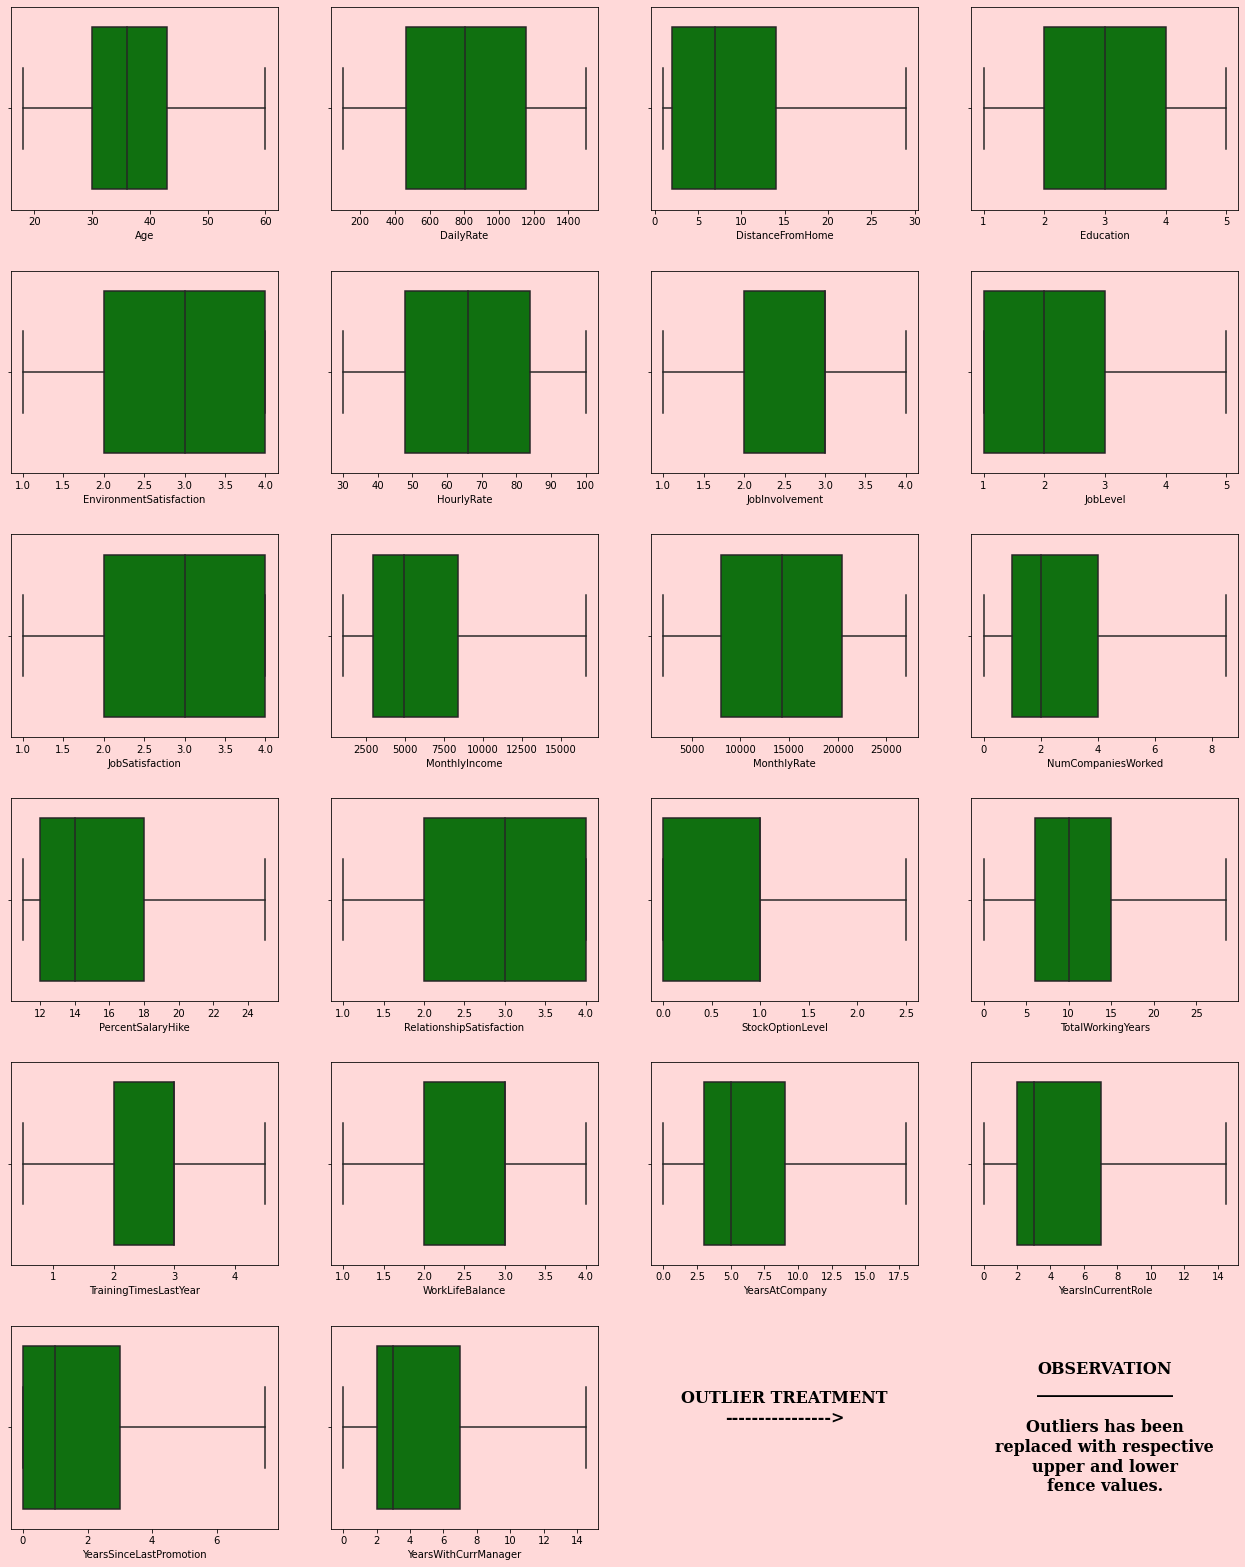

In [33]:
# Creating subplots
fig = plt.figure(figsize=(22,28))
spec = fig.add_gridspec(6,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, 
                  sec_17, sec_18,sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11, 
       sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18, sec_19, sec_20, sec_21, sec_22]
cnt = 0
for feature in data_model:
    if data_model[feature].dtype!='O' and len(data_model[feature].unique())>2:
        sns.boxplot(data_model[feature], ax=sec[cnt], color='green')
        cnt+=1

# Narrating the observations
sec_23.text(0.5,0.5,'OUTLIER TREATMENT\n---------------->\n\n',
ha='center',va='center', size=16, family='serif', weight=600)
        
sec_24.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
Outliers has been\nreplaced with respective\nupper and lower\nfence values.',
ha='center',va='center', size=16, family='serif', weight=600)
  
# Removing axis and spines
for sec in [sec_23, sec_24]:
    for location in ['top', 'right', 'bottom','left']:
        sec.spines[location].set_visible(False)
        sec.xaxis.set_visible(False)
        sec.yaxis.set_visible(False)

### ENCODING THE CATEGORICAL FEATURES

In [34]:
# Encoding the categorical features
data_model = pd.get_dummies(data_model, drop_first=True)
data_model.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41.0,1102.0,1.0,2.0,2.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,11.0,3,1.0,0.0,8.0,0.5,1.0,6.0,4.0,0.0,5.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49.0,279.0,8.0,1.0,3.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,23.0,4,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37.0,1373.0,2.0,2.0,4.0,92.0,2.0,1.0,3.0,2090.0,2396.0,6.0,15.0,3,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33.0,1392.0,3.0,4.0,4.0,56.0,3.0,1.0,3.0,2909.0,23159.0,1.0,11.0,3,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27.0,591.0,2.0,1.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,8.5,12.0,3,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [35]:
# Renaming the columns
data_model.rename(columns={'Attrition_Yes': 'Attrition', 
                           'Gender_Male':'Gender', 
                           'OverTime_Yes':'OverTime'}, inplace=True)
data_model.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime
0,41.0,1102.0,1.0,2.0,2.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,11.0,3,1.0,0.0,8.0,0.5,1.0,6.0,4.0,0.0,5.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49.0,279.0,8.0,1.0,3.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,23.0,4,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37.0,1373.0,2.0,2.0,4.0,92.0,2.0,1.0,3.0,2090.0,2396.0,6.0,15.0,3,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33.0,1392.0,3.0,4.0,4.0,56.0,3.0,1.0,3.0,2909.0,23159.0,1.0,11.0,3,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27.0,591.0,2.0,1.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,8.5,12.0,3,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [36]:
print('Shape of the encoded dataset is :',data_model.shape)

Shape of the encoded dataset is : (2940, 45)


### HANDLING IMBALANCE

In [37]:
# From the EDA we have found that the dataset is heavily imbalanced.
# This has to handled before model building.
# Since we have very less number of datapoints, oversampling can be used.

X_imbal = data_model.drop('Attrition', axis=1)
y_imbal = data_model['Attrition']
print('Shape of X and y before sampling: ',X_imbal.shape, y_imbal.shape)

from imblearn.combine import SMOTETomek  # Synthetic Minority Oversampling TEchnique - Tomek
smote_model = SMOTETomek(random_state=42)
X_balanced, y_balanced = smote_model.fit_resample(X_imbal, y_imbal)
print('Shape of X and y after sampling: ',X_balanced.shape, y_balanced.shape)

Shape of X and y before sampling:  (2940, 44) (2940,)
Shape of X and y after sampling:  (4932, 44) (4932,)


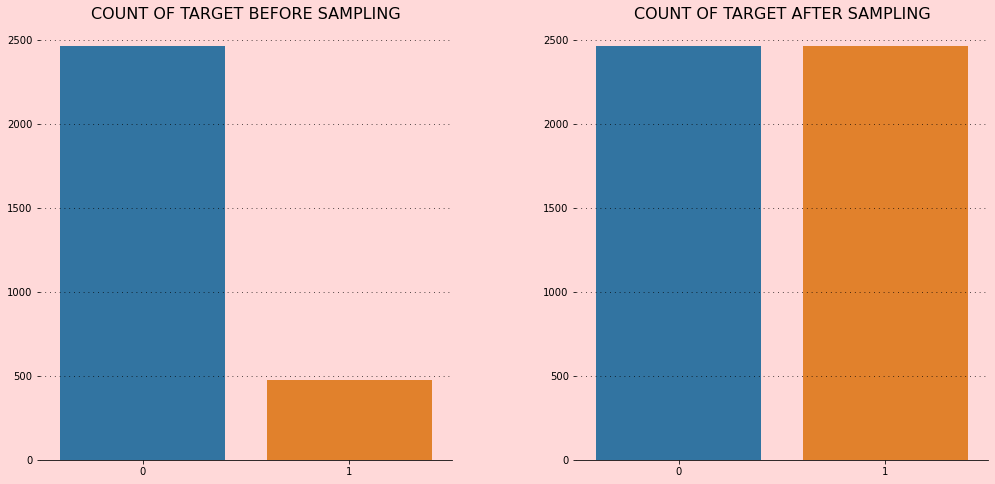

In [38]:
# Creating plot structure
fig = plt.figure(figsize=(17,8))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3,hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)
    
# Plotting graph
sns.countplot(y_imbal, ax=sec_1)
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_1.set_title('COUNT OF TARGET BEFORE SAMPLING', size=16)
sec_1.set_xlabel('')

sns.countplot(y_balanced, ax=sec_2)
sec_2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_2.set_title('COUNT OF TARGET AFTER SAMPLING', size=16)
sec_2.set_xlabel('')


# Removing axis and spines
for position in ['left', 'right', 'top']:
    for selection in [sec_1, sec_2]:
            selection.spines[position].set_visible(False)
            selection.set_xlabel('')
            selection.set_ylabel('')

In [39]:
# Merging the balanced datasets

balanced_data = pd.concat([X_balanced, y_balanced], axis=1)
print('Shape of the balanced dataset is: ',balanced_data.shape)
balanced_data.head()

Shape of the balanced dataset is:  (4932, 45)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime,Attrition
0,41.0,1102.0,1.0,2.0,2.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,11.0,3,1.0,0.0,8.0,0.5,1.0,6.0,4.0,0.0,5.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
1,49.0,279.0,8.0,1.0,3.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,23.0,4,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,37.0,1373.0,2.0,2.0,4.0,92.0,2.0,1.0,3.0,2090.0,2396.0,6.0,15.0,3,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1
3,33.0,1392.0,3.0,4.0,4.0,56.0,3.0,1.0,3.0,2909.0,23159.0,1.0,11.0,3,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,27.0,591.0,2.0,1.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,8.5,12.0,3,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


### CHECKING FOR CORRELATION

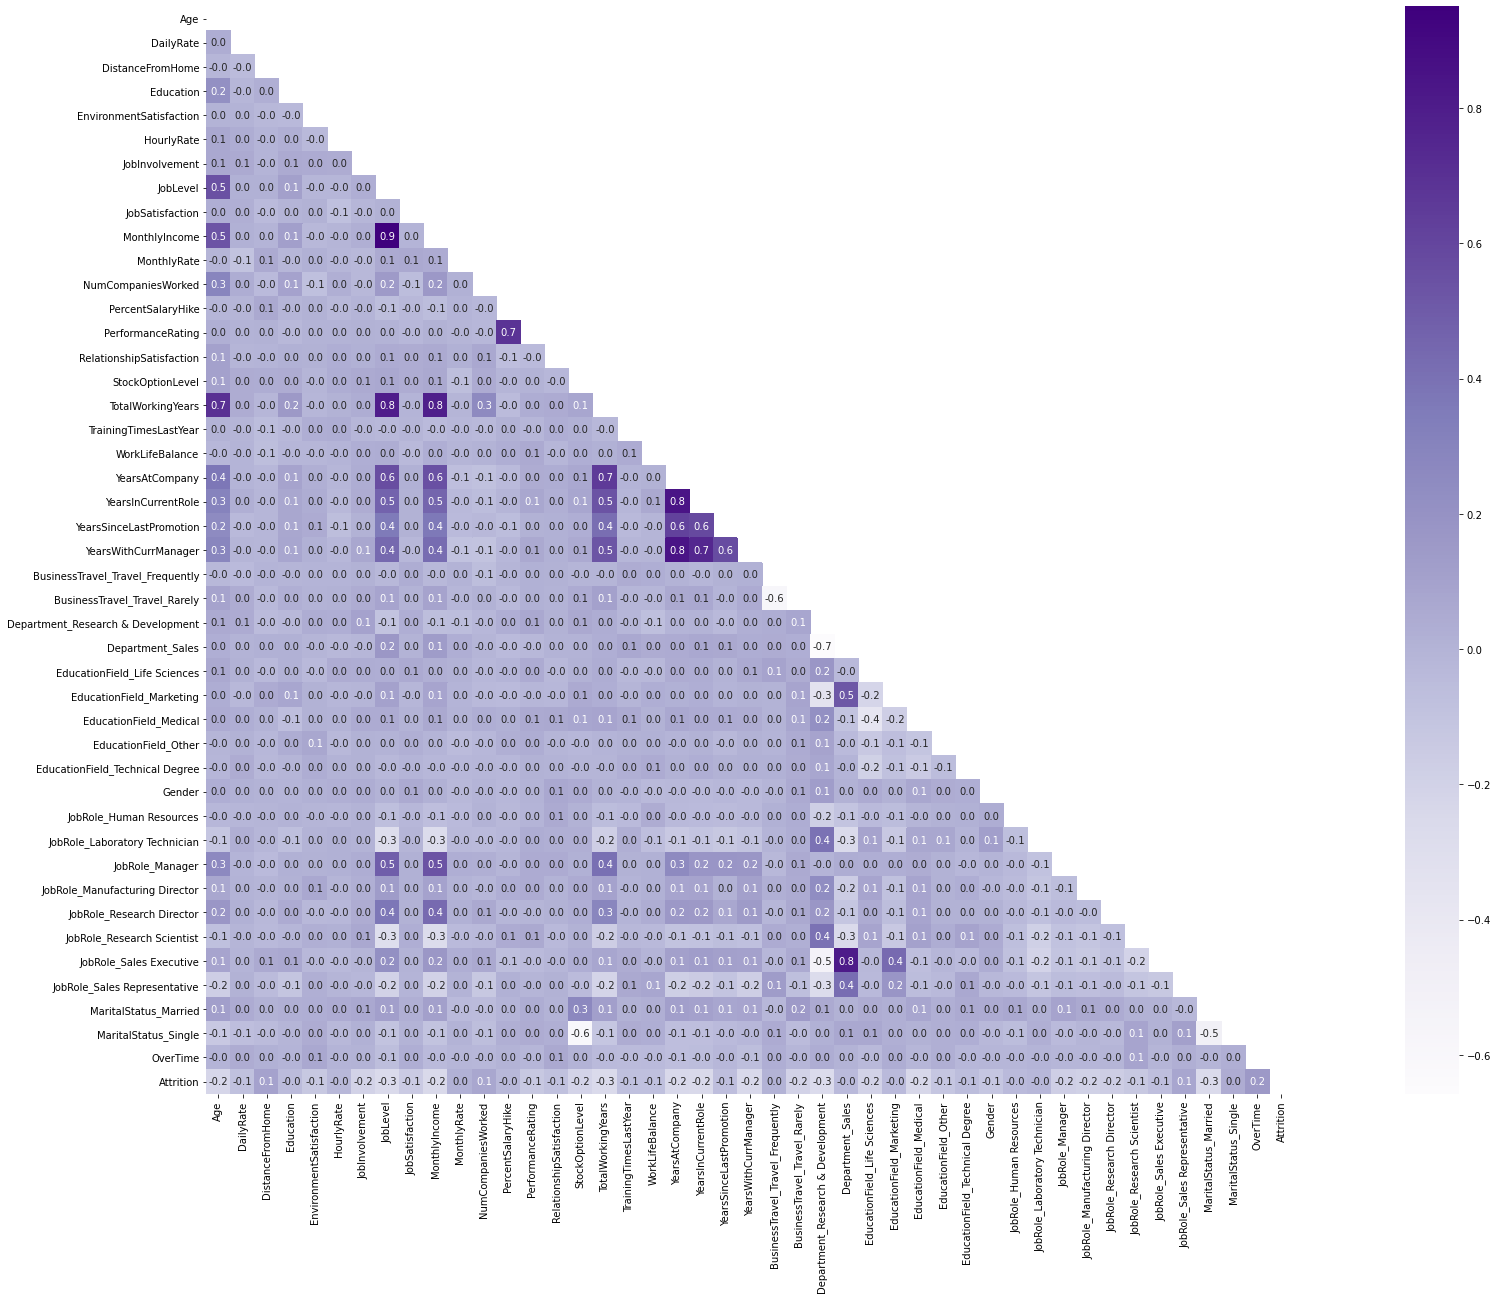

In [40]:
plt.figure(figsize=(40,20))
correlation = balanced_data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt = '.1f', square=True, mask=mask, cmap='Purples')
plt.show()

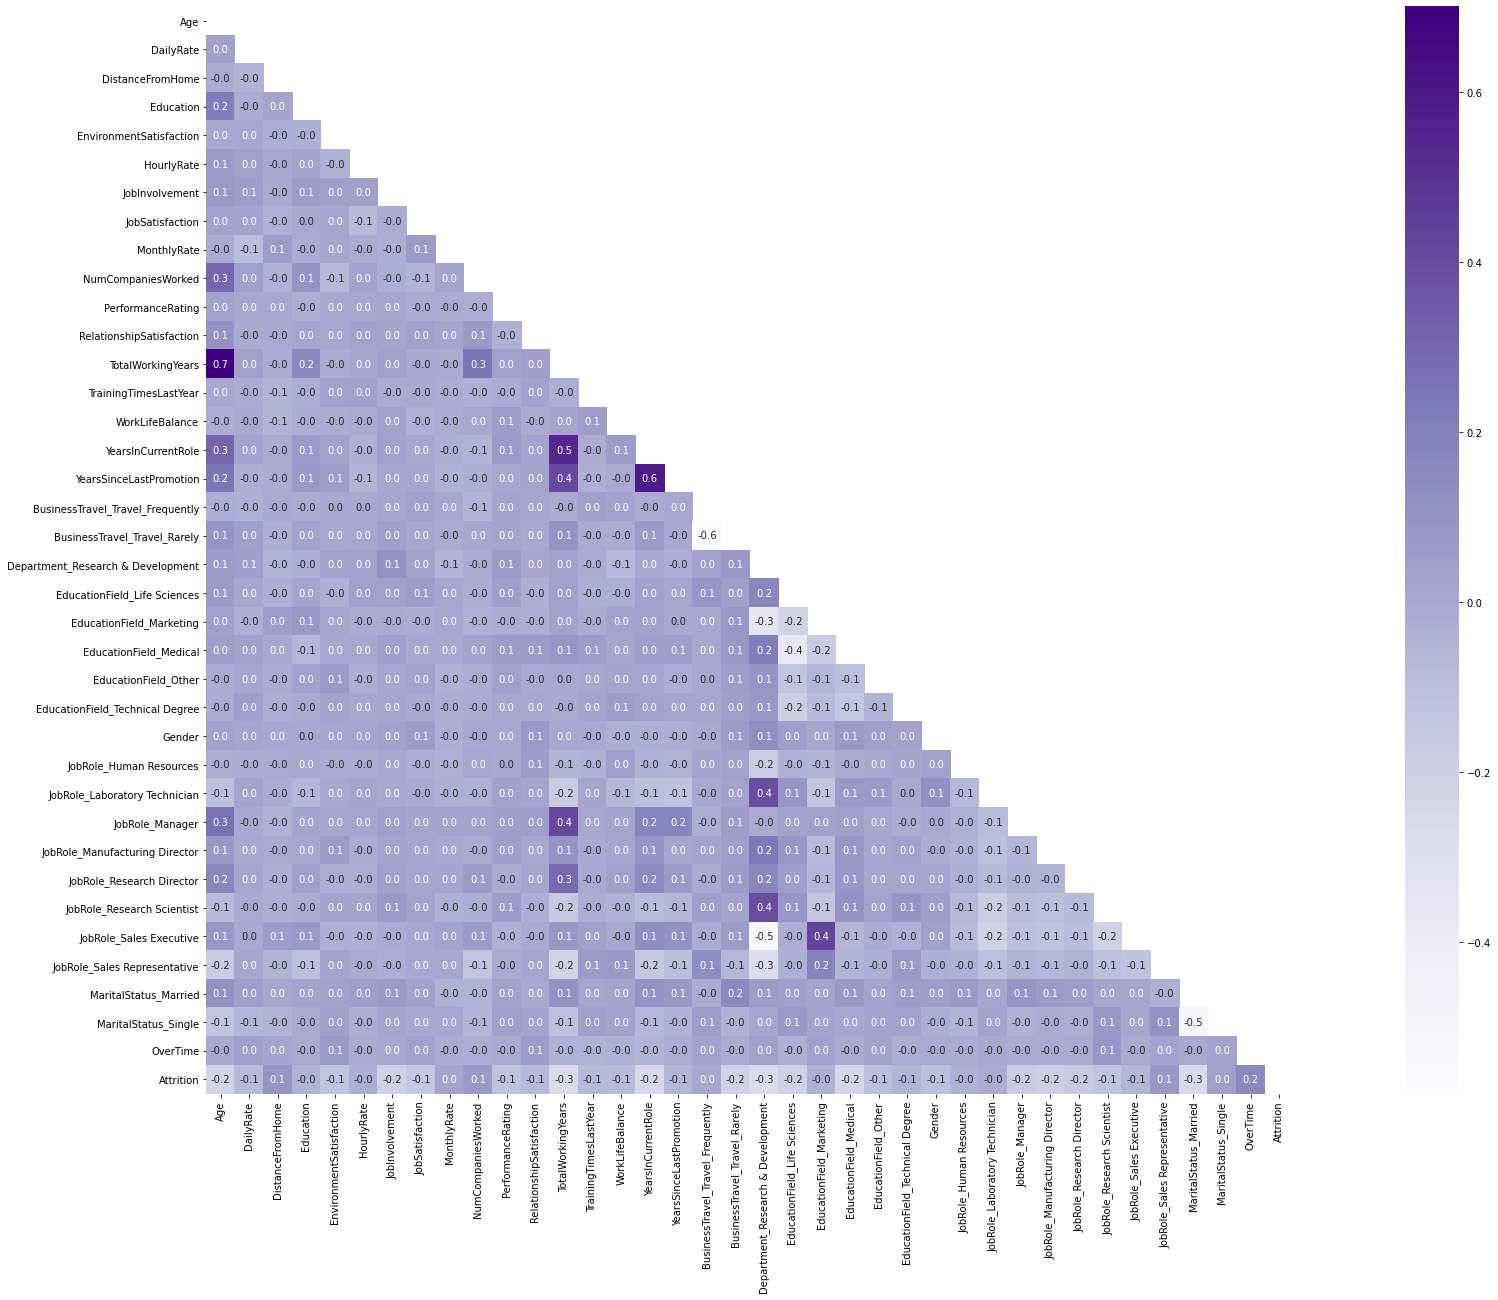

In [41]:
# Removing multi-colinearity
final_data = balanced_data.drop(['JobLevel', 'MonthlyIncome', 
                                  'PercentSalaryHike', 'YearsAtCompany', 
                                  'StockOptionLevel', 'YearsWithCurrManager',
                                  'Department_Sales'], axis=1)
plt.figure(figsize=(40,20))
correlation = final_data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt = '.1f', square=True, mask=mask, cmap='Purples')
plt.show()

# MODEL BUILDING

## TREE BASED MODELS

### IMPORTING REQUIRED LIBRARIES

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_curve, confusion_matrix

### TRAIN AND TEST DATASET

In [43]:
x = final_data.drop('Attrition', axis=1)
y = final_data['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (3945, 37)
Shape of x_test: (987, 37)
Shape of y_train: (3945,)
Shape of y_test: (987,)


### DECISION TREE CLASSIFIER

In [44]:
dt_model = DecisionTreeClassifier(criterion='gini',random_state=42)
dt_model.fit(x_train, y_train)
print('Training score',dt_model.score(x_train, y_train))
print('Testing score',dt_model.score(x_test, y_test))

Training score 1.0
Testing score 0.9716312056737588


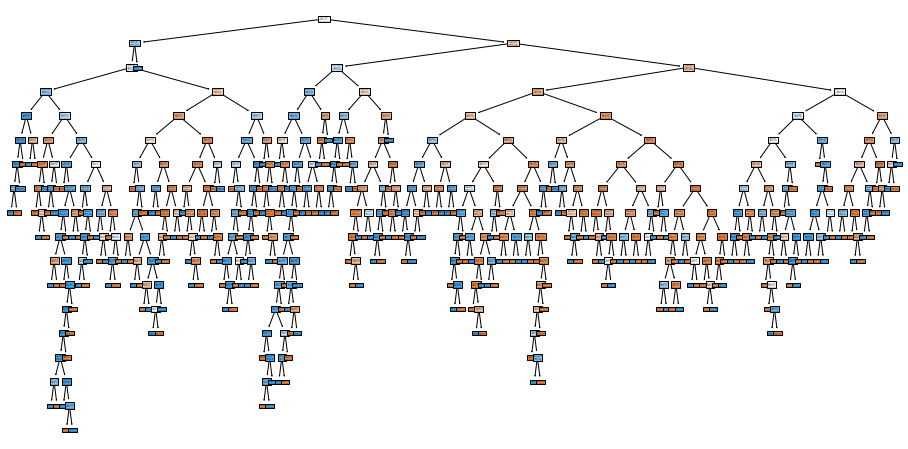

In [45]:
# Tree grown to its max depth
plt.figure(figsize=(16,8))
tree.plot_tree(dt_model, filled=True)
plt.show()

In [46]:
# cost complexity pruning (post-pruning)
path = dt_model.cost_complexity_pruning_path(x_train, y_train) 
ccp_alphas, impurities = path.ccp_alphas, path.impurities

tree_models = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(criterion='gini',random_state=42, ccp_alpha=alpha)
    model.fit(x_train, y_train)
    tree_models.append(model)
    
print(f'Number of nodes in last tree {tree_models[-1].tree_.node_count}, with ccp_alpha: {ccp_alphas[-1]}')

Number of nodes in last tree 1, with ccp_alpha: 0.03711682402326322


<IPython.core.display.Javascript object>


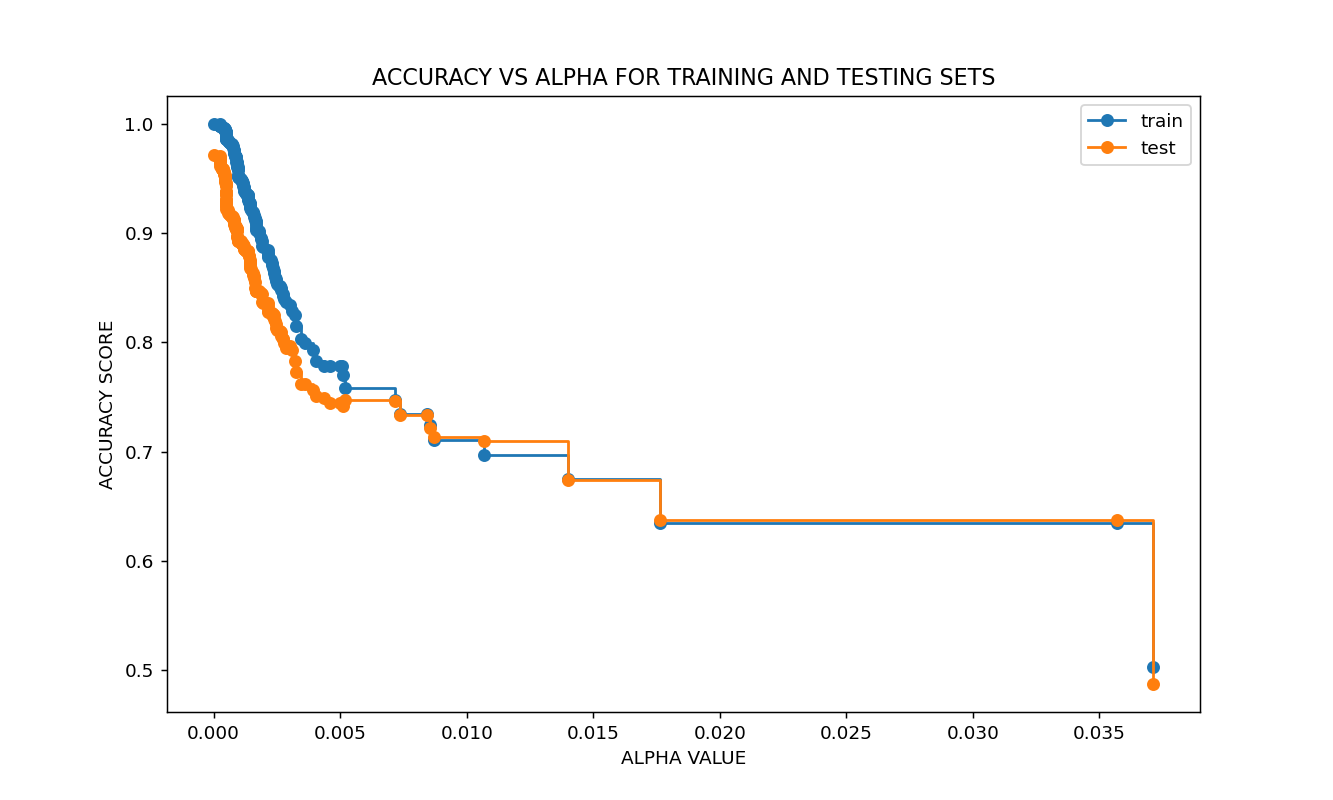

In [47]:
# List of training and testing score for each model
training_score = [model.score(x_train, y_train) for model in tree_models]
testing_score = [model.score(x_test, y_test) for model in tree_models]

# To make the plot interactive
%matplotlib notebook
%matplotlib notebook

# Plotting alpha vs accuracy score
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ccp_alphas, training_score, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, testing_score, marker='o', label='test', drawstyle='steps-post')
ax.set_title('ACCURACY VS ALPHA FOR TRAINING AND TESTING SETS')
ax.set_xlabel('ALPHA VALUE')
ax.set_ylabel('ACCURACY SCORE')
ax.legend()
plt.show()

In [48]:
%matplotlib inline

# Decision tree model with optimum ccp_alpha
dtree_model = DecisionTreeClassifier(criterion='gini',random_state=42, ccp_alpha=0.0014)
dtree_model.fit(x_train, y_train)
y_pred = dtree_model.predict(x_test)

# Performance metrices
print('Training score:',dtree_model.score(x_train, y_train))
print('Testing score:',accuracy_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
print('Precsion score:',precision_score(y_test, y_pred))
print('\nConfusion matrix:\n',confusion_matrix(y_test, y_pred))

Training score: 0.9305449936628644
Testing score: 0.8814589665653495
Recall score: 0.8918918918918919
Precsion score: 0.868421052631579

Confusion matrix:
 [[441  65]
 [ 52 429]]


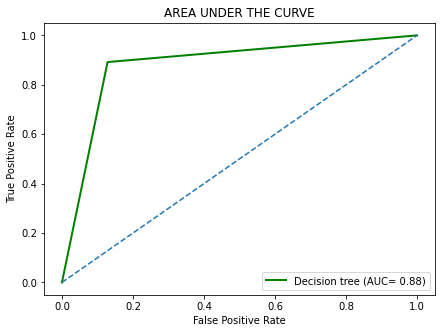

In [49]:
# Plotting area under the curve
tpr, fpr, _ = roc_curve(y_test, y_pred)
au_roc = auc(tpr, fpr)

plt.figure(figsize=(7,5))
plt.plot(tpr, fpr, lw=2, label=f'Decision tree (AUC= {np.round(au_roc,2)})', color='g')
plt.plot([0,1], ls='--')
plt.title('AREA UNDER THE CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

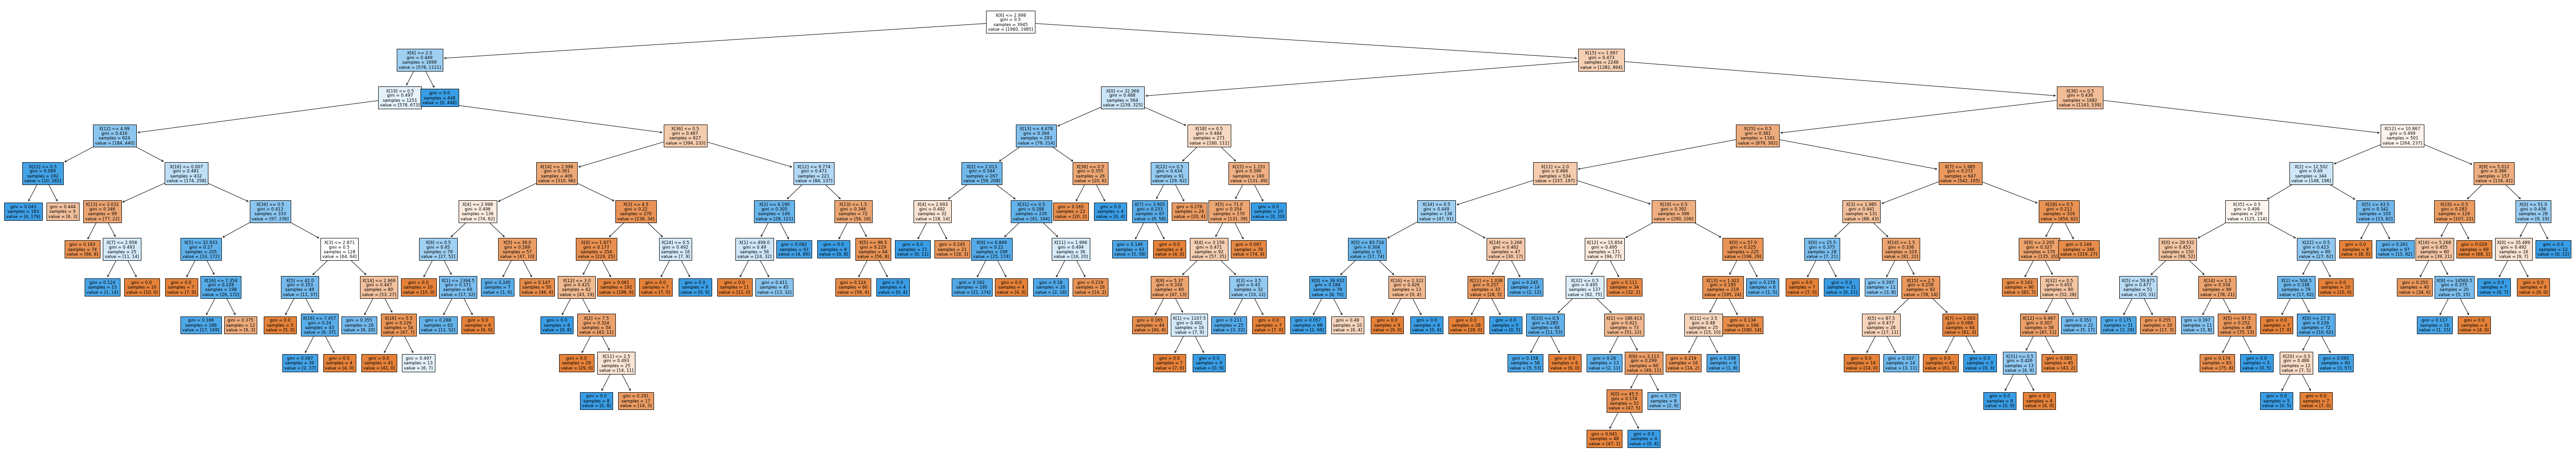

In [50]:
# Final tree after pruning
plt.figure(figsize=(99,18))
tree.plot_tree(dtree_model, filled=True, fontsize=9)
plt.savefig('Decision_tree.png', bbox_inches='tight')
plt.show()

### 

### RANDOM FOREST CLASSIFIER

In [51]:
rf_model = RandomForestClassifier(random_state=42)

# Hyper-parameter tuning

np.random.seed(40)
import time
start = time.time()

parameters = {'criterion': ['gini','entropy'],
              'max_depth': [4,5,6],
              'bootstrap':[True, False],
              'max_features' : ["auto", "sqrt", "log2"]}

rf_gscv = GridSearchCV(rf_model, cv=10, 
                       param_grid = parameters, 
                       n_jobs = 3)
rf_gscv.fit(x_train, y_train)
print('Best parameters are:\n', rf_gscv.best_params_)
end = time.time()
print(f'Time taken for grid search {np.round((end-start),2)}s')

Best parameters are:
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}
Time taken for grid search 50.38s


In [53]:
rf_model.set_params(criterion = 'gini', 
                    max_depth=6, 
                    max_features='auto', 
                    bootstrap=True,
                    oob_score =True)

min_feat = 15
max_feat = 1001

error_rate = {}
for estimator in range(min_feat, max_feat):
    rf_model.set_params(n_estimators = estimator)
    rf_model.fit(x_test, y_test)
    
    oob_error = 1 - rf_model.oob_score_
    error_rate[estimator] = oob_error

### OOB RATE

<IPython.core.display.Javascript object>


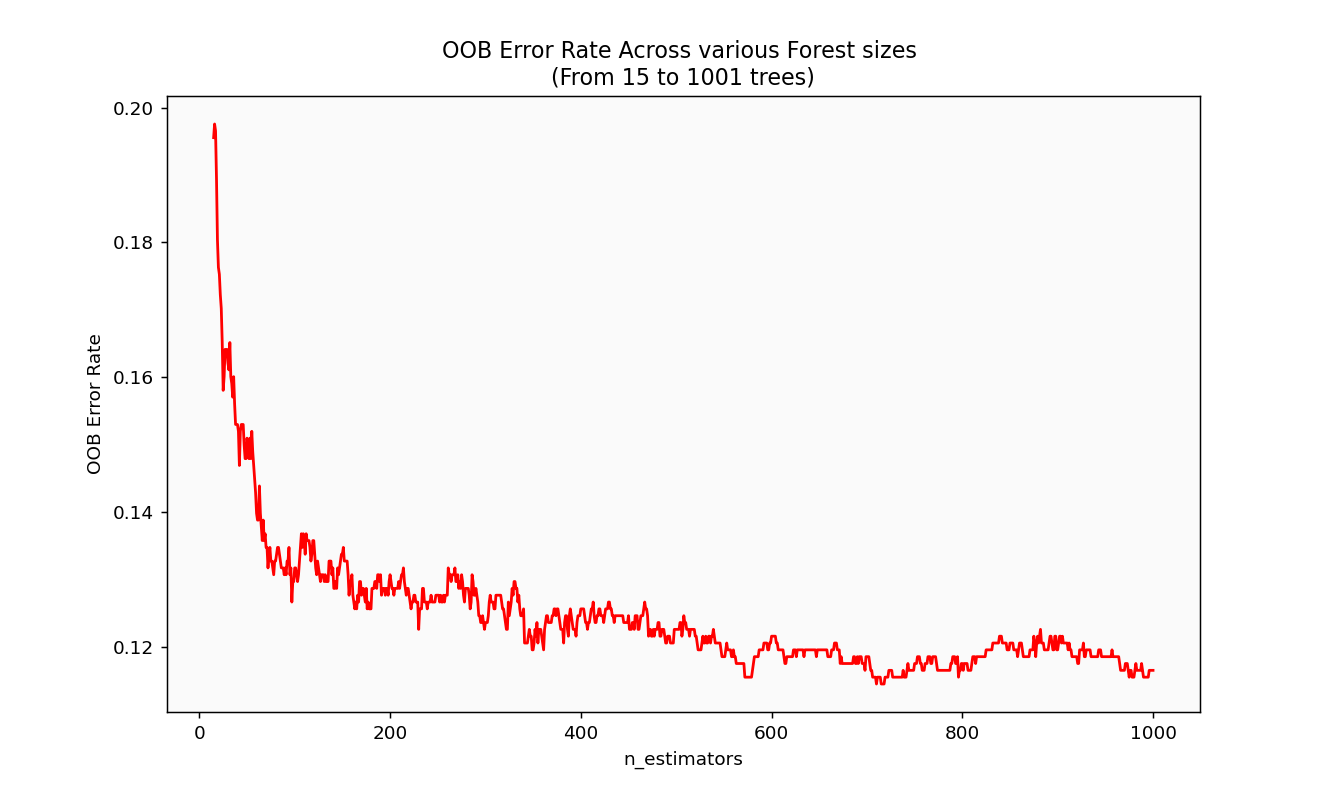

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1001 trees)')

In [54]:
oob_series = pd.Series(error_rate)
%matplotlib notebook
%matplotlib notebook

fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')


oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1001 trees)')

In [55]:
%matplotlib inline

In [56]:
print('OOB Error rate for 573 trees is: {0:.5f}'.format(oob_series[573]))

OOB Error rate for 573 trees is: 0.11550


In [57]:
rf_model = RandomForestClassifier(n_estimators=573,criterion = 'gini', 
                    max_depth=6, 
                    max_features='auto', 
                    bootstrap=False,
                    oob_score =False)
rf_model.fit(x_train, y_train)
pred = rf_model.predict(x_test)

In [58]:
print("Training score: ",rf_model.score(x_train, y_train))
print("Testing score: ",accuracy_score(y_test, pred))
print('Recall score: ',recall_score(y_test, pred))
print('Precision score: ', precision_score(y_test, pred))
print('\nConfusion matrix:\n', confusion_matrix(y_test, pred))

Training score:  0.9300380228136882
Testing score:  0.9179331306990881
Recall score:  0.9002079002079002
Precision score:  0.9291845493562232

Confusion matrix:
 [[473  33]
 [ 48 433]]


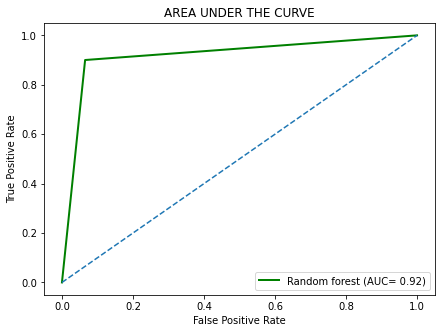

In [58]:
# Plotting area under the curve
rf_tpr, rf_fpr, _ = roc_curve(y_test, pred)
au_roc = auc(rf_tpr, rf_fpr)

plt.figure(figsize=(7,5))
plt.plot(rf_tpr, rf_fpr, lw=2, label=f'Random forest (AUC= {np.round(au_roc,2)})', color='g')
plt.plot([0,1], ls='--')
plt.title('AREA UNDER THE CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## 

### NAIVE BAYES CLASSIFICATION

In [59]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
nb_pred = classifier.predict(x_test)

In [60]:
print('Training score: ', classifier.score(x_train, y_train))
print('Testing score: ', accuracy_score(y_test, nb_pred))
print('Recall score: ', recall_score(y_test, nb_pred))
print('Precision score: ', precision_score(y_test, nb_pred))

tpr, fpr, _ = roc_curve(y_test, nb_pred)
au_roc = auc(tpr, fpr)
print('Area under the curve: ', au_roc)

print('\nConfusion matrix:\n', confusion_matrix(y_test, nb_pred))

Training score:  0.7399239543726236
Testing score:  0.7416413373860182
Recall score:  0.9064449064449065
Precision score:  0.6749226006191951
Area under the curve:  0.7457125717995283

Confusion matrix:
 [[296 210]
 [ 45 436]]


### PREPARING DATA FOR DISTANCE BASED MODELS

In [61]:
# Importing and scaling the data to standard normal distribution
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(x)

# Checking the mean and standard deviation
mean = np.mean(X_scaled, axis=0)
std = np.std(X_scaled, axis=0)
print(f'mean: {int(mean[0]), int(mean[1])}')
print(f'Standard deviation: {int(std[0]), int(std[1])}')

mean: (0, 0)
Standard deviation: (0, 1)


In [62]:
scaled_x = X_scaled
scaled_y = y

sx_train,sx_test, sy_train, sy_test = train_test_split(scaled_x, scaled_y, test_size=0.3, random_state=42)

### K-NEAREST NEIGHBOR

In [63]:
from sklearn.neighbors import KNeighborsClassifier

error = []
for estimator in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors= estimator)
    knn.fit(sx_train, sy_train)
    pred_est = knn.predict(sx_test)
    error.append(np.mean(pred_est != sy_test))

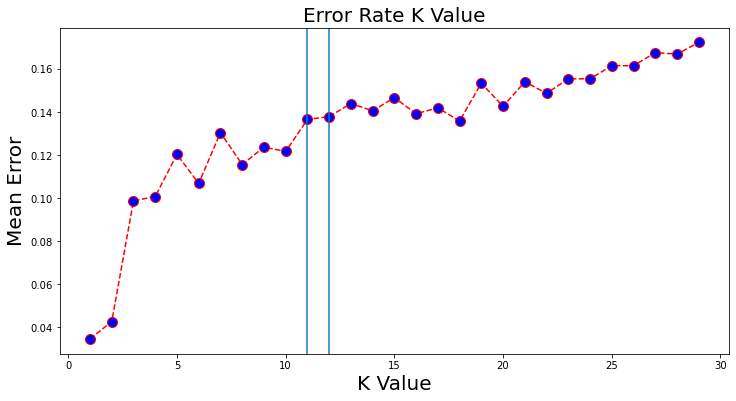

In [64]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
[plt.axvline(x=i) for i in range(11,13)]
plt.title('Error Rate K Value', size=20)  
plt.xlabel('K Value', size=20)  
plt.ylabel('Mean Error', size=20)  
plt.show()

In [65]:
%matplotlib inline
knn_estimator = KNeighborsClassifier(n_neighbors=11)
knn_estimator.fit(sx_train, sy_train)
knn_pred = knn_estimator.predict(sx_test)

print('Training score: ', knn_estimator.score(sx_train, sy_train))
print('Testing score: ', accuracy_score(sy_test, knn_pred))
print('Recall score: ', recall_score(sy_test, knn_pred))
print('Precision score: ', precision_score(sy_test, knn_pred))

tpr, fpr, _ = roc_curve(sy_test, knn_pred)
au_roc = auc(tpr, fpr)
print('Area under the curve: ', au_roc)

print('\nConfusion matrix:\n', confusion_matrix(sy_test, knn_pred))

Training score:  0.8960023174971031
Testing score:  0.8635135135135135
Recall score:  0.9218967921896792
Precision score:  0.8190830235439901
Area under the curve:  0.8652734288602394

Confusion matrix:
 [[617 146]
 [ 56 661]]


### SVM Model

In [66]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)

In [67]:
parameters = {'C': np.arange(0.1,1,0.1),
              'kernel': ['linear', 'poly', 'rbf'], 
              'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
              'degree': [2,3,4,5]}

In [68]:
svm_gc = GridSearchCV(svm_model, param_grid=parameters, cv=10, scoring='accuracy')
svm_gc.fit(sx_train, sy_train)
print(svm_gc.best_params_)

{'C': 0.6, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [69]:
svm = SVC(C= 0.6, degree= 3, gamma= 0.05, kernel= 'poly', random_state=42)
svm.fit(sx_train, sy_train)
svm_pred = svm.predict(sx_test)

print('Training score: ', svm.score(sx_train, sy_train))
print('Testing score: ', accuracy_score(sy_test, svm_pred))
print('Recall score: ', recall_score(sy_test, svm_pred))
print('Precision score: ', precision_score(sy_test, svm_pred))

trp, fpr, _ = roc_curve(sy_test, svm_pred)
au_roc = auc(tpr, fpr)
print('Area under the curve: ', au_roc)


print('\nConfusion matrix:\n', confusion_matrix(sy_test, svm_pred))

Training score:  0.9982618771726536
Testing score:  0.9790540540540541
Recall score:  0.9776847977684798
Precision score:  0.979050279329609
Area under the curve:  0.8931674316496396

Confusion matrix:
 [[748  15]
 [ 16 701]]


### LOGISTIC REGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(n_jobs=3)
logreg_model.fit(sx_train, sy_train)
logreg_pred = logreg_model.predict(sx_test)

In [71]:
print('Training score: ', logreg_model.score(sx_train, sy_train))
print('Testing score: ', accuracy_score(sy_test, logreg_pred))
print('Recall score: ', recall_score(sy_test, logreg_pred))
print('Precision score: ', precision_score(sy_test, logreg_pred))

tpr, fpr, _ = roc_curve(sy_test, logreg_pred)
au_roc = auc(tpr, fpr)
print('Area under the curve: ', au_roc)

print('\nConfusion matrix:\n', confusion_matrix(sy_test, logreg_pred))

Training score:  0.8577636152954808
Testing score:  0.8567567567567568
Recall score:  0.8423988842398884
Precision score:  0.8591749644381224
Area under the curve:  0.8563239506389482

Confusion matrix:
 [[664  99]
 [113 604]]
